# 神经网络：线性回归

实验内容：

使用advertising-dataset广告预测数据集，以TV, Radio, Newspaper三种特征作为模型的输入，Sales作为模型的输出
1. 学会梯度下降的基本思想
2. 学会使用梯度下降求解线性回归
3. 了解归一化处理的作用

## 1. 导入数据

使用advertising-dataset广告预测数据，选3列作为特征

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('data/advertising/advertising.csv')
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
data = data[features + [target]]

## 2. 数据预处理

In [2]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data[features], data[target], test_size = 0.4, random_state = 32)

## 3. 参数初始化

这里，我们要初始化参数$\mathbf{w}$和$b$，其中$\mathbf{w} \in \mathbb{R}^m$，$b \in \mathbb{R}$，初始化的策略是将$\mathbf{w}$初始化成一个随机数矩阵，参数$b$为0。

In [4]:
def initialize(m):
    '''
    参数初始化，将W初始化成一个随机向量，b是一个长度为1的向量
    
    '''
    np.random.seed(32)
    W = np.random.normal(size = (m, )) * 0.01
    b = np.zeros((1, ))
    return W, b

## 4. 前向传播

这里，我们要完成输入矩阵$\mathbf{X}$在神经网络中的计算，也就是完成 $z_i = \mathbf{x}_i\mathbf{w} + b$ 的计算。

In [5]:
def forward(X, W, b):
    '''
    前向传播，计算Z = XW + b
    '''
    # 完成Z = XW + b的计算
    # YOUR CODE HERE
    Z = np.dot(X, W) + b
    return Z

## 5. 损失函数

In [7]:
def mse(y_true, y_pred):
    '''
    MSE，均方误差
    
    '''
    # 计算MSE
    # YOUR CODE HERE
    loss = np.mean(np.square(y_true - y_pred))
    return loss

## 6. 反向传播

In [9]:
def compute_gradient(X, Z, y_true):
    '''
    计算梯度
    
    '''
    n = len(y_true)
    # 计算W的梯度
    # YOUR CODE HERE
    dW = -2 * np.dot(X.T, (y_true - Z)) / n
    # 计算b的梯度
    # YOUR CODE HERE
    db = -2 * np.sum(y_true - Z) / n
    return dW, db

## 7. 梯度下降

In [11]:
def update(dW, db, W, b, learning_rate):
    '''
    梯度下降，参数更新，不需要返回值，W和b实际上是以引用的形式传入到函数内部，
    函数内改变W和b会直接影响到它们本身，所以不需要返回值
    '''
    W -= learning_rate * dW
    b -= learning_rate * db

In [13]:
def backward(X, Z, y_true, W, b, learning_rate):
    '''
    使用compute_gradient和update函数，先计算梯度，再更新参数
    
    '''
    # 计算参数的梯度
    # YOUR CODE HERE
    dW, db = compute_gradient(X, Z, y_true)
    # 更新参数
    # YOUR CODE HERE
    update(dW, db, W, b, learning_rate)

## 8. 训练

In [15]:
def train(trainX, trainY, testX, testY, W, b, epochs, learning_rate = 0.01, verbose = False):
    '''
    训练，我们要迭代epochs次，每次迭代的过程中，做一次前向传播和一次反向传播，更新参数
    同时记录训练集和测试集上的损失值，后面画图用。然后循环往复，直到达到最大迭代次数epochs
    
    '''
    training_loss_list = []
    testing_loss_list = []
    
    for epoch in range(epochs):
        Z = forward(trainX, W, b)
        training_loss = mse(trainY, Z)
        testing_loss = mse(testY, forward(testX, W, b))
        training_loss_list.append(training_loss)
        testing_loss_list.append(testing_loss)
        if verbose:
            print('epoch %s training loss: %s'%(epoch+1, training_loss))
            print('epoch %s testing loss: %s'%(epoch+1, testing_loss))
            print()
        backward(trainX, Z, trainY, W, b, learning_rate)
        
    return training_loss_list, testing_loss_list

## 9. 检查

In [17]:
def plot_loss_curve(training_loss_list, testing_loss_list):
    '''
    绘制损失值变化曲线
    '''
    plt.figure(figsize = (10, 6))
    plt.plot(training_loss_list, label = 'training loss')
    plt.plot(testing_loss_list, label = 'testing loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

上面这些函数就是完成整个神经网络需要的函数了

|函数名|功能|
|-|-|
|initialize | 参数初始化|
|forward | 给定数据，计算神经网络的输出值|
|mse | 给定真值，计算神经网络的预测值与真值之间的差距|
|backward | 计算参数的梯度，并实现参数的更新|
|compute_gradient | 计算参数的梯度|
|update | 参数的更新|
|backward | 计算参数梯度，并且更新参数|
|train | 训练神经网络|
|plot_loss_curve | 绘制损失函数的变化曲线|

我们使用参数初始化函数和训练函数，完成神经网络的训练。

In [18]:
m = trainX.shape[1]
W, b = initialize(m)
training_loss_list, testing_loss_list = train(trainX, trainY, testX, testY, W, b, 20, learning_rate = 0.01, verbose = True)

epoch 1 training loss: 253.9597844091999
epoch 1 testing loss: 274.4937791029965

epoch 2 training loss: 79603189.50674823
epoch 2 testing loss: 88378582.20804393

epoch 3 training loss: 26433646100028.41
epoch 3 testing loss: 29354804919701.95

epoch 4 training loss: 8.777837329273915e+18
epoch 4 testing loss: 9.747891875706296e+18

epoch 5 training loss: 2.914861919347206e+24
epoch 5 testing loss: 3.236988658844328e+24

epoch 6 training loss: 9.679400164472991e+29
epoch 6 testing loss: 1.0749088445363751e+30

epoch 7 training loss: 3.214244452614835e+35
epoch 7 testing loss: 3.569456507583592e+35

epoch 8 training loss: 1.0673561610858086e+41
epoch 8 testing loss: 1.185311649833794e+41

epoch 9 training loss: 3.5443762644780753e+46
epoch 9 testing loss: 3.9360717920121835e+46

epoch 10 training loss: 1.1769832378552791e+52
epoch 10 testing loss: 1.3070538161036677e+52

epoch 11 training loss: 3.9084155823853715e+57
epoch 11 testing loss: 4.340341763222271e+57

epoch 12 training loss:

绘制损失值的变化曲线

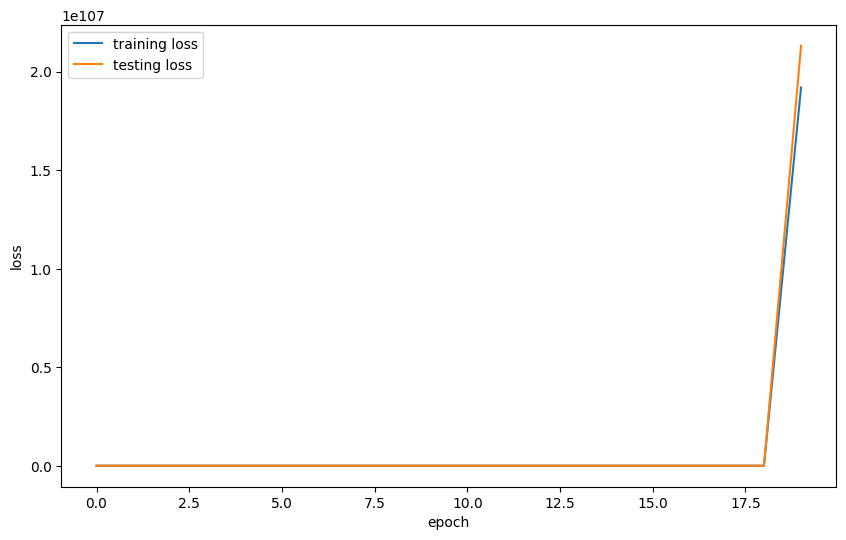

In [19]:
plot_loss_curve(training_loss_list, testing_loss_list)

通过打印损失的信息我们可以看到损失值持续上升，这就说明哪里出了问题。但是如果所有的测试样例都通过了，就说明我们的实现是没有问题的。运行下面的测试样例，观察哪里出了问题。

## 10. 标准化处理

标准化处理和第一题一样

In [21]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
trainX_normalized = stand.fit_transform(trainX)
testX_normalized = stand.transform(testX)

重新训练模型，这次我们迭代40轮，学习率设置为0.1

In [22]:
m = trainX.shape[1]
W, b = initialize(m)
training_loss_list, testing_loss_list = train(trainX_normalized, trainY, testX_normalized, testY, W, b, 40, learning_rate = 0.1, verbose = False)

打印损失值变化曲线

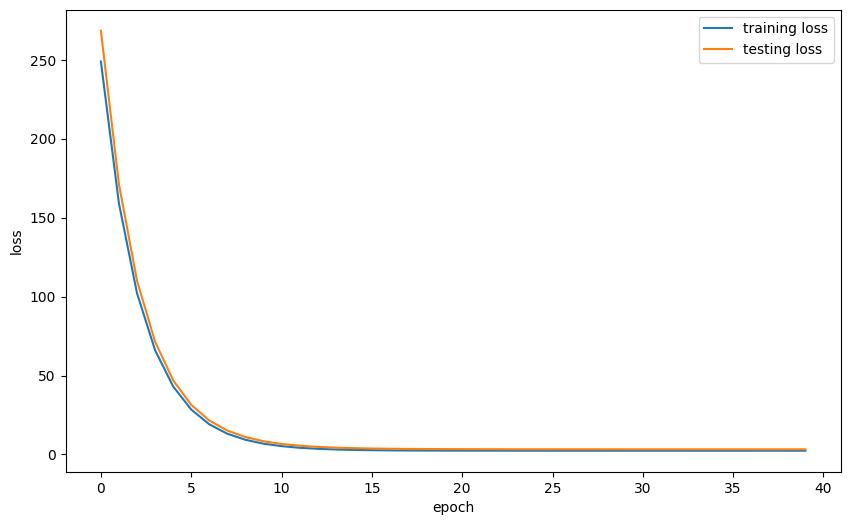

In [23]:
plot_loss_curve(training_loss_list, testing_loss_list)

计算测试集上的MSE

In [24]:
prediction = forward(testX_normalized, W, b)
mse(testY, prediction) ** 0.5

1.8045783304813474